In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

**NOTE:**
    You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a8722b8f9d4c9719c6b819532ba8e05


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | soderhamn
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | ippy
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | nioro
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | preobrazhenskaya
City not found. Skipping...
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | marieville
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | tabuk
Processing Record 20 of Set 1 | camacha
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | albany
Processing Re

Processing Record 41 of Set 4 | havelian
Processing Record 42 of Set 4 | soyo
Processing Record 43 of Set 4 | azimur
City not found. Skipping...
Processing Record 44 of Set 4 | clyde river
Processing Record 45 of Set 4 | were ilu
Processing Record 46 of Set 4 | korhogo
Processing Record 47 of Set 4 | rawson
Processing Record 48 of Set 4 | tandlianwala
Processing Record 49 of Set 4 | rokytne
Processing Record 50 of Set 4 | berea
Processing Record 1 of Set 5 | hay river
Processing Record 2 of Set 5 | yellowknife
Processing Record 3 of Set 5 | yuzhnyy
Processing Record 4 of Set 5 | kelo
Processing Record 5 of Set 5 | kuching
Processing Record 6 of Set 5 | andahuaylas
Processing Record 7 of Set 5 | arraial do cabo
Processing Record 8 of Set 5 | selkirk
Processing Record 9 of Set 5 | victoria
Processing Record 10 of Set 5 | nyurba
Processing Record 11 of Set 5 | bengkulu
Processing Record 12 of Set 5 | caluquembe
Processing Record 13 of Set 5 | hanmer springs
Processing Record 14 of Set 5 |

Processing Record 28 of Set 8 | flin flon
Processing Record 29 of Set 8 | poum
Processing Record 30 of Set 8 | nipawin
Processing Record 31 of Set 8 | cockburn town
Processing Record 32 of Set 8 | buala
Processing Record 33 of Set 8 | port lincoln
Processing Record 34 of Set 8 | jiddah
City not found. Skipping...
Processing Record 35 of Set 8 | khandwa
Processing Record 36 of Set 8 | antofagasta
Processing Record 37 of Set 8 | pedreiras
Processing Record 38 of Set 8 | aklavik
Processing Record 39 of Set 8 | puerto colombia
Processing Record 40 of Set 8 | kingisepp
Processing Record 41 of Set 8 | esperance
Processing Record 42 of Set 8 | balkanabat
Processing Record 43 of Set 8 | ulagan
Processing Record 44 of Set 8 | aflu
City not found. Skipping...
Processing Record 45 of Set 8 | tari
Processing Record 46 of Set 8 | dekoa
City not found. Skipping...
Processing Record 47 of Set 8 | mastic beach
Processing Record 48 of Set 8 | nishihara
Processing Record 49 of Set 8 | kampong thum
Proce

Processing Record 18 of Set 12 | ilhabela
Processing Record 19 of Set 12 | najran
Processing Record 20 of Set 12 | pedernales
Processing Record 21 of Set 12 | mbini
Processing Record 22 of Set 12 | kargasok
Processing Record 23 of Set 12 | sola
Processing Record 24 of Set 12 | say
Processing Record 25 of Set 12 | maniitsoq
Processing Record 26 of Set 12 | bilma
Processing Record 27 of Set 12 | halalo
City not found. Skipping...
Processing Record 28 of Set 12 | yagodnoye
Processing Record 29 of Set 12 | broome
Processing Record 30 of Set 12 | kitob
Processing Record 31 of Set 12 | sharjah
Processing Record 32 of Set 12 | vaasa
Processing Record 33 of Set 12 | killybegs
Processing Record 34 of Set 12 | rocha
Processing Record 35 of Set 12 | salaverry
Processing Record 36 of Set 12 | luba
Processing Record 37 of Set 12 | hervey bay
Processing Record 38 of Set 12 | polunochnoye
Processing Record 39 of Set 12 | landang
City not found. Skipping...
Processing Record 40 of Set 12 | kungurtug
P

In [11]:
len(city_data)

580

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,-20.20,76,20,4.61,CA,2021-02-14 03:42:24
1,Soderhamn,61.3037,17.0592,28.00,85,26,3.00,SE,2021-02-14 03:42:24
2,New Norfolk,-42.7826,147.0587,78.01,35,0,3.00,AU,2021-02-14 03:39:26
3,Rikitea,-23.1203,-134.9692,80.29,74,98,12.93,PF,2021-02-14 03:38:40
4,Ippy,6.2679,21.2247,68.90,29,11,3.18,CF,2021-02-14 03:42:24
5,Chuy,-33.6971,-53.4616,68.92,94,46,6.87,UY,2021-02-14 03:42:24
6,Port Alfred,-33.5906,26.8910,73.00,94,64,3.00,ZA,2021-02-14 03:42:24
7,Nioro,13.3500,-15.7500,72.72,18,44,5.26,GM,2021-02-14 03:42:24
8,Busselton,-33.6500,115.3333,84.42,39,19,6.96,AU,2021-02-14 03:38:17
9,Atuona,-9.8000,-139.0333,79.07,80,1,17.16,PF,2021-02-14 03:38:18


In [13]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2021-02-14 03:42:24,55.7435,-97.8558,-20.20,76,20,4.61
1,Soderhamn,SE,2021-02-14 03:42:24,61.3037,17.0592,28.00,85,26,3.00
2,New Norfolk,AU,2021-02-14 03:39:26,-42.7826,147.0587,78.01,35,0,3.00
3,Rikitea,PF,2021-02-14 03:38:40,-23.1203,-134.9692,80.29,74,98,12.93
4,Ippy,CF,2021-02-14 03:42:24,6.2679,21.2247,68.90,29,11,3.18


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

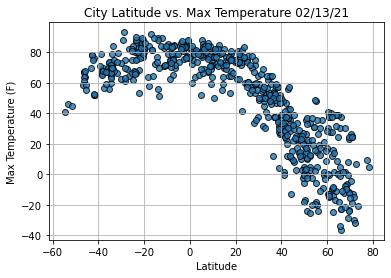

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

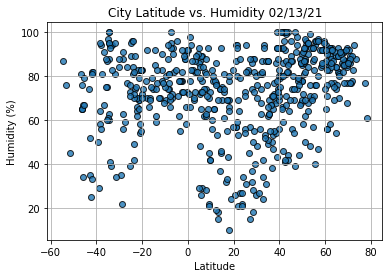

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

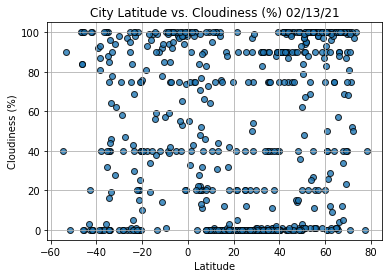

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

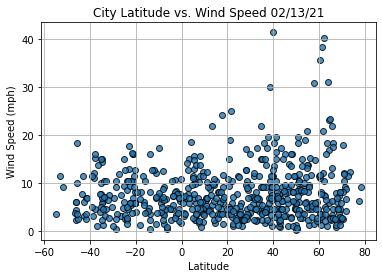

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                   Marieville
Country                        CA
Date          2021-02-14 03:42:25
Lat                       45.4334
Lng                      -73.1658
Max Temp                     8.01
Humidity                       56
Cloudiness                    100
Wind Speed                      3
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
575     True
576     True
577     True
578     True
579     True
Name: Lat, Length: 580, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2021-02-14 03:42:24,55.7435,-97.8558,-20.20,76,20,4.61
1,Soderhamn,SE,2021-02-14 03:42:24,61.3037,17.0592,28.00,85,26,3.00
4,Ippy,CF,2021-02-14 03:42:24,6.2679,21.2247,68.90,29,11,3.18
7,Nioro,GM,2021-02-14 03:42:24,13.3500,-15.7500,72.72,18,44,5.26
11,Hilo,US,2021-02-14 03:42:25,19.7297,-155.0900,73.40,83,75,3.44


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

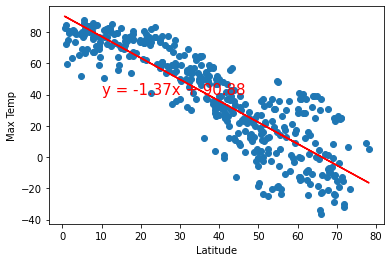

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

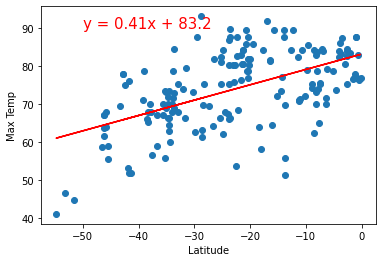

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))

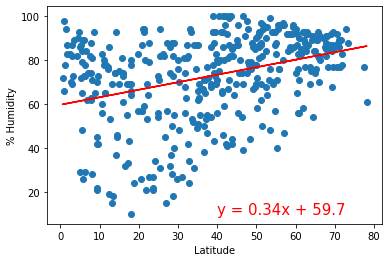

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

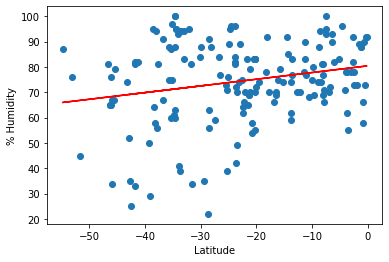

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

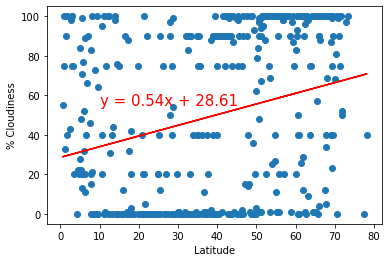

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

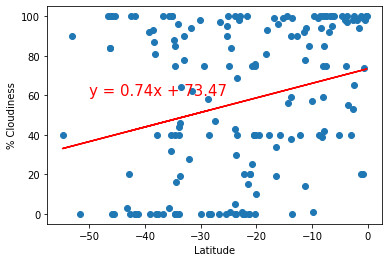

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

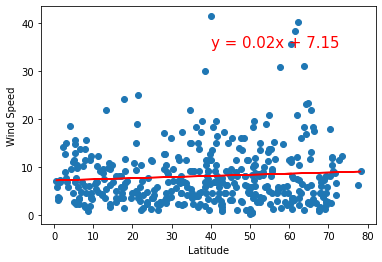

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

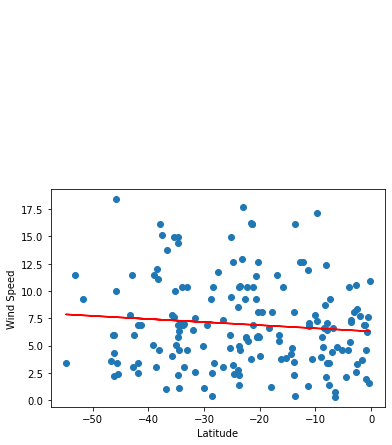

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))